In [60]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pydicom import dcmread
from pydicom.data import get_testdata_file

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
root_data_path = 'data'# '../input/rsna-miccai-brain-tumor-radiogenomic-classification'
train_images_path = root_data_path + '/train'
test_images_path = root_data_path + '/test'
train_labels_path = root_data_path + '/train_labels.csv'

In [3]:
IMAGE_SIZE = 128

In [8]:
def load_data_for_patient(p_id, label, image_type, resize=True, size=256):
    
    image_data = []
    image_labels = []
    files = os.listdir(os.path.join(train_images_path, p_id, image_type))
    
    for f in range(0, len(files), 3):
        dicom_image = dcmread(os.path.join(train_images_path, p_id, image_type, files[f]))
        pixel_array = dicom_image.pixel_array[80:400, 100:420]
        
            
        if np.max(pixel_array) == 0: #Blank image
            continue 
        else:

            if(resize == True):
                pixel_array = cv2.resize(pixel_array, (size, size))
                
            pixel_array = np.array(pixel_array, dtype = float)
            pixel_array /= 4095
            pixel_array = list(pixel_array)
            
            image_data.append(pixel_array)
            image_labels.append(label)
    
    image_data_array = np.array(image_data)
    image_labels_array = np.array(image_labels)
    del files
    del image_data
    del image_labels
    gc.collect()
    #print('Max Pixel Value: ', max_p)
#     print(image_data_array.shape)
    return image_data_array, image_labels_array

In [9]:
def load_train_data(image_type, image_size):
    train_data = np.empty((0,image_size,image_size), dtype=float)
    train_labels = np.empty((0), dtype=int)
    train_labels_df =  pd.read_csv(train_labels_path, dtype={'BraTS21ID': str})
    
    for index, patient in train_labels_df.iterrows():
        image_data, image_labels = load_data_for_patient(patient['BraTS21ID'], patient['MGMT_value'], image_type, resize=True, size=image_size)
        if(image_data.shape[0] > 0):
            train_data = np.append(train_data, image_data, axis=0)
            train_labels = np.append(train_labels, image_labels, axis=0)
            
        del image_data
        del image_labels
        gc.collect()
        
#     print(train_data.shape)
#     print(train_labels.shape)
    return train_data, train_labels
    

In [11]:
train_data, train_labels = load_train_data('FLAIR', IMAGE_SIZE)
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

done


In [129]:
model2 = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(LSTM(128), merge_mode='concat'),
        tf.keras.layers.Dense(64, activation='relu'), # FC layer for the classification part
        tf.keras.layers.Dense(64, activation='relu'), # FC layer for the classification part
        tf.keras.layers.Dense(1, activation='sigmoid') # final FC layer
        ])

model2.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(1e-4),
        metrics=['accuracy'])

epochs = 100
history2 = model2.fit(
        X_train, y_train,
        batch_size=32,
        validation_split=0.2,
        epochs=epochs,
        shuffle=True,
        verbose=2)

Epoch 1/100
355/355 - 27s - loss: 0.6729 - accuracy: 0.5868 - val_loss: 0.6668 - val_accuracy: 0.5994 - 27s/epoch - 77ms/step
Epoch 2/100
355/355 - 25s - loss: 0.6633 - accuracy: 0.6006 - val_loss: 0.6606 - val_accuracy: 0.5973 - 25s/epoch - 71ms/step
Epoch 3/100
355/355 - 25s - loss: 0.6602 - accuracy: 0.6034 - val_loss: 0.6588 - val_accuracy: 0.6100 - 25s/epoch - 70ms/step
Epoch 4/100
355/355 - 25s - loss: 0.6573 - accuracy: 0.6114 - val_loss: 0.6572 - val_accuracy: 0.6157 - 25s/epoch - 70ms/step
Epoch 5/100
355/355 - 25s - loss: 0.6519 - accuracy: 0.6158 - val_loss: 0.6479 - val_accuracy: 0.6199 - 25s/epoch - 70ms/step
Epoch 6/100
355/355 - 25s - loss: 0.6501 - accuracy: 0.6183 - val_loss: 0.6444 - val_accuracy: 0.6336 - 25s/epoch - 70ms/step
Epoch 7/100
355/355 - 25s - loss: 0.6418 - accuracy: 0.6276 - val_loss: 0.6485 - val_accuracy: 0.6241 - 25s/epoch - 70ms/step
Epoch 8/100
355/355 - 25s - loss: 0.6361 - accuracy: 0.6355 - val_loss: 0.6356 - val_accuracy: 0.6358 - 25s/epoch - 70

Epoch 66/100
355/355 - 25s - loss: 0.2648 - accuracy: 0.8598 - val_loss: 0.4441 - val_accuracy: 0.7846 - 25s/epoch - 70ms/step
Epoch 67/100
355/355 - 25s - loss: 0.2588 - accuracy: 0.8595 - val_loss: 0.4935 - val_accuracy: 0.7747 - 25s/epoch - 70ms/step
Epoch 68/100
355/355 - 25s - loss: 0.2669 - accuracy: 0.8574 - val_loss: 0.4913 - val_accuracy: 0.7821 - 25s/epoch - 70ms/step
Epoch 69/100
355/355 - 25s - loss: 0.2532 - accuracy: 0.8661 - val_loss: 0.4813 - val_accuracy: 0.7750 - 25s/epoch - 70ms/step
Epoch 70/100
355/355 - 25s - loss: 0.2570 - accuracy: 0.8621 - val_loss: 0.4508 - val_accuracy: 0.7884 - 25s/epoch - 70ms/step
Epoch 71/100
355/355 - 25s - loss: 0.2727 - accuracy: 0.8554 - val_loss: 0.4725 - val_accuracy: 0.7821 - 25s/epoch - 70ms/step
Epoch 72/100
355/355 - 25s - loss: 0.2537 - accuracy: 0.8662 - val_loss: 0.4779 - val_accuracy: 0.7761 - 25s/epoch - 69ms/step
Epoch 73/100
355/355 - 25s - loss: 0.2495 - accuracy: 0.8648 - val_loss: 0.4690 - val_accuracy: 0.7842 - 25s/ep

In [130]:
model2.evaluate(X_test, y_test, batch_size=32, verbose=2)

111/111 - 3s - loss: 0.5370 - accuracy: 0.7873 - 3s/epoch - 26ms/step


[0.5369831919670105, 0.7873060703277588]

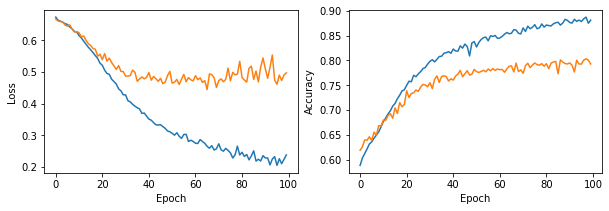

In [131]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 3))
# results[["Train Loss", "Test Loss"]].plot(ax=ax[0])
# results[["Train Accuracy", "Test Accuracy"]].plot(ax=ax[1])

ax[0].plot(history2.history['loss'])
ax[0].plot(history2.history['val_loss'])
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].plot(history1.history['accuracy'])
ax[1].plot(history1.history['val_accuracy'])
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
plt.show()

In [ ]:
model2.summary()